# Project: Investigate a Movies Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> For the project investigating a dataset I selected the 'TMDB-Movies' dataset as movies picked my interest and wanted to know what insights the data has to offer about the movies. This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.


### Question that can be analyised and answered from this dataset are as follows: 
<ol>
    <li> Did the number of movies released is increasing by years?
    <li> How the popularity of movies is affected over years? Does it have to do anything with runtime of a movie?
    <li> How are budgets and revenue of the movies are affected over years?
    <li> Which are some of the top movies with highest profit earned?
    <li> Which are the most popular genres of all time?
</ol>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> After observing the dataset and proposed questions for the analysis we will be keeping only relevent data deleting the unsued data so that we can make our calculation easy and understandable.

In [2]:
# Loading the data into dataframe from csv file to be used for our analysis.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


After observing the data and considering the questions we are going to answer, we can eleminate the data we are not going to use for our analysis
So dropped the columns which we are not going to use.

In [3]:
df.drop(['imdb_id', 'homepage', 'overview', 'release_date', 'tagline'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 16 columns):
id                      10866 non-null int64
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
keywords                9373 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), int64(6), object(6)
memory usage: 1.3+ MB


In [4]:
# Duplicate rows will be dropped if there are any.
df.drop_duplicates(inplace=True)

We know there are missing values, so lets check for those

In [5]:
df.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
keywords                1493
runtime                    0
genres                    23
production_companies    1030
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

<p>As you can see there are still missing values in the 4 columns.
<p>There are less missing values in <font color=red>director</font> and <font color=red>genres</font> so we can drop those rows as we won't loose much data.

#### Dropping the rows which contains null values from those specific columns
and not from every column, by this way we still have null values in our dataframe, but haven't lost much data which could provide us useful insights.

In [6]:
df.dropna(subset=['genres', 'id'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 16 columns):
id                      10842 non-null int64
popularity              10842 non-null float64
budget                  10842 non-null int64
revenue                 10842 non-null int64
original_title          10842 non-null object
cast                    10767 non-null object
director                10800 non-null object
keywords                9367 non-null object
runtime                 10842 non-null int64
genres                  10842 non-null object
production_companies    9826 non-null object
vote_count              10842 non-null int64
vote_average            10842 non-null float64
release_year            10842 non-null int64
budget_adj              10842 non-null float64
revenue_adj             10842 non-null float64
dtypes: float64(4), int64(6), object(6)
memory usage: 1.4+ MB


In [7]:
df.query('runtime == 0').count()['id']

30

In [8]:
df.query('budget == 0').count()['id']

5674

In [9]:
df.query('revenue == 0').count()['id']

5993

Upon observing the columns we are going to use more closely, I found that some columns contains "zeros" as the numerical value and not NaN which could create problems during our analysis process.

So let's replace those zero values with NAN values so there wont be any errors in statistical computations

In [10]:
# runtime column has small number of null values, so it's okay if we drop them.
df.query('runtime != 0', inplace=True)

df['budget'] = df['budget'].replace(0, np.NAN)
df['revenue'] = df['revenue'].replace(0, np.NAN)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10812 entries, 0 to 10865
Data columns (total 16 columns):
id                      10812 non-null int64
popularity              10812 non-null float64
budget                  5165 non-null float64
revenue                 4849 non-null float64
original_title          10812 non-null object
cast                    10737 non-null object
director                10772 non-null object
keywords                9352 non-null object
runtime                 10812 non-null int64
genres                  10812 non-null object
production_companies    9813 non-null object
vote_count              10812 non-null int64
vote_average            10812 non-null float64
release_year            10812 non-null int64
budget_adj              10812 non-null float64
revenue_adj             10812 non-null float64
dtypes: float64(6), int64(4), object(6)
memory usage: 1.4+ MB


<p> Now you can clearly see that there are so many missing values in the <font color=red>revenue</font> and <font color=red>budget</font> columns.

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Q1. Did the number of movies released is increasing by years?

#### Lets try to count the number of movies released in each year.

In [11]:
movies_by_yrs = df.groupby(['release_year'])['id'].count()

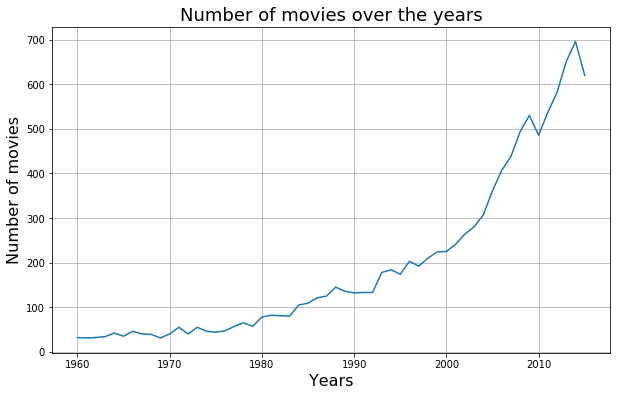

In [12]:
plt.figure(figsize=(10,6))
plt.grid()
plt.plot(movies_by_yrs.index, movies_by_yrs.values)
plt.title('Number of movies over the years', size=18)
plt.xlabel('Years', size=16)
plt.ylabel('Number of movies', size=16);

### Q2. How the popularity of movies is affected over years? Does it have to do anything with runtime of a movie?

First, let us look for the runtimes of the movies over the years.
Using 'groupby' method of the pandas, calculating mean of the runtime of movies per year.

In [13]:
runtime_info = df.groupby(['release_year'])['runtime'].mean()

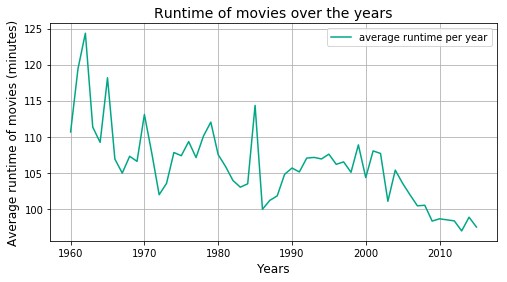

In [14]:
plt.figure(figsize=(8,4))
plt.plot(runtime_info.index, runtime_info.values, label='average runtime per year', color='#00a787');
plt.title('Runtime of movies over the years', size=14)
plt.xlabel('Years', size=12)
plt.ylabel('Average runtime of movies (minutes)', size=12)
plt.legend()
plt.grid()

From the above graph we can see that over time the runtime has decreased, not significantly but it has(upto 30-35 mins of runtime).
The decrease in runtime could aslo mean that in modern days people don't prefer watching long movies much.

<hr>
Now lets take a look at popularity of the movies over the years.
For that lets calculate popularity mean of movies per each year using 'groupby' method of pandas

In [15]:
pop_info = df.groupby(['release_year'])['popularity'].mean()

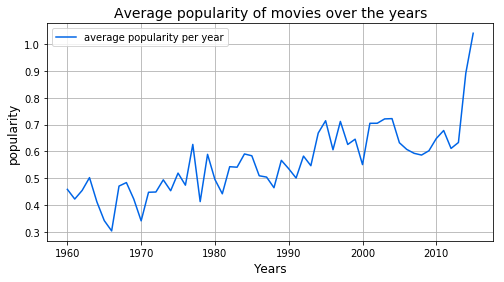

In [16]:
plt.figure(figsize=(8,4))
plt.plot(pop_info.index, pop_info.values, label='average popularity per year', color='#0065e7');
plt.title('Average popularity of movies over the years', size=14)
plt.xlabel('Years', size=12)
plt.ylabel('popularity', size=12)
plt.legend()
plt.grid()

The above graph clearly shows that the popularity of the movies have increased significantly over the time.

<hr>
Both the attributes above i.e. "popularity" and "runtime" are affected over time.

Now lets look at them simultaneously to get proper insights.

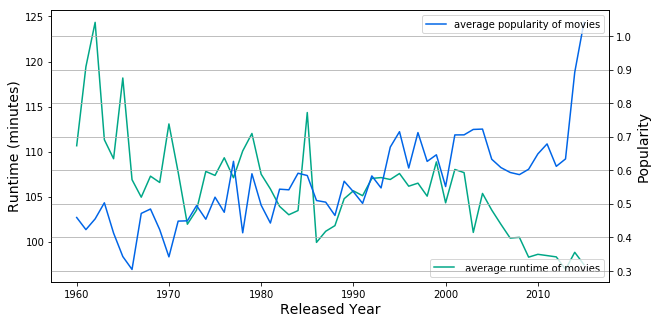

In [17]:
fig, ax1 = plt.subplots(figsize=(10,5))

# plot for the runtime over years
ax1.plot(runtime_info.index, runtime_info.values, color='#00a787', label=' average runtime of movies');
ax1.set_xlabel('Released Year', size=14)
ax1.set_ylabel('Runtime (minutes)', size=14)
ax1.legend(loc=4)

ax2 = ax1.twinx()

# plot for the popularity over years
ax2.plot(pop_info.index, pop_info.values, color='#0065e7', label='average popularity of movies');
ax2.set_ylabel('Popularity', size=14)
ax2.legend(loc=1)
plt.grid()

The above graph does tells us that both are related as lower the runtime higher the popularity, but that assumption can be wrong as there is little decrease in runtime and also we havent considered other attributes like genre or budget which could affect the popularity highly over the years.

#### Now lets look at revenues and budgets of the movies.

### Q3. How are the budgets and the revenues of the movies are affected over years?

In [18]:
revenue_info = df.groupby(['release_year']).revenue.mean()
budget_info = df.groupby(['release_year']).budget.mean()

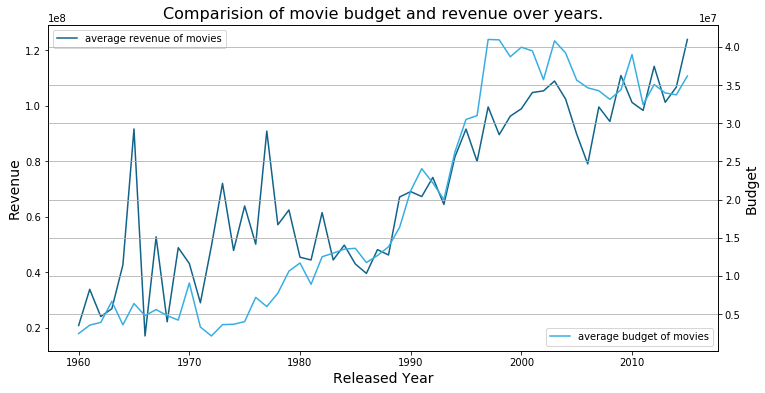

In [22]:
fig, ax1 = plt.subplots(figsize=(12,6))

# plot for the movie revenue over years
ax1.plot(revenue_info.index, revenue_info.values, color='#106389', label='average revenue of movies');
ax1.set_xlabel('Released Year', size=14)
ax1.set_ylabel('Revenue', size=14)
ax1.legend(loc=2)

ax2 = ax1.twinx()

# plot for the movie budget over years
ax2.plot(budget_info.index, budget_info.values, color='#37aee1', label='average budget of movies')
ax2.set_ylabel('Budget', size=14);
ax2.legend(loc=4)
plt.title('Comparision of movie budget and revenue over years.', size=16)
plt.grid()

Explain some of the observed trends from above graph here
From the above graph we can see that revenue is almost always higher than budget(as expected), but you could also see that in between year 1985 - 1995 movies earn less revenue than any other time over the span of 1960 to 2015.

##### Now lets look at the profit earned by movies over the years.

In [48]:
# calculating profit column from budget and revenue
df['profit'] = df.revenue - df.budget

# grouping by profit earned
profit_info = df.groupby(['release_year']).profit.mean()

View home page > Explore courses > View course overview page > Enroll in course > Complete course

H 
0
​	 :CTR 
new
​	 −CTR 
old
​	 ≤0

H_1: CTR_{new} - CTR_{old} > 0



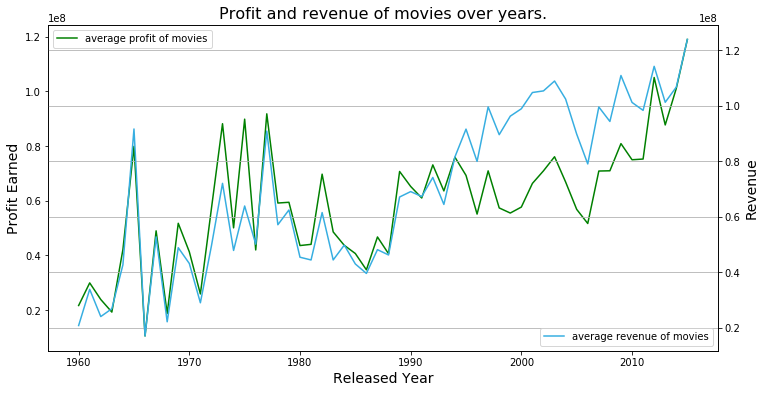

In [50]:
fig, ax1 = plt.subplots(figsize=(12,6))

# plot for the movie revenue over years
ax1.plot(profit_info.index, profit_info.values, color='green', label='average profit of movies');
ax1.set_xlabel('Released Year', size=14)
ax1.set_ylabel('Profit Earned', size=14)
ax1.legend(loc=2)

ax2 = ax1.twinx()

# plot for the movie budget over years
ax2.plot(revenue_info.index, revenue_info.values, color='#37aee1', label='average revenue of movies');
ax2.set_ylabel('Revenue', size=14);
ax2.legend(loc=4)

plt.title('Profit and revenue of movies over years.', size=16)
plt.grid()

### Q4. Which are some of the top movies with highest profit earned?

### Q5. Which are the most popular genres of all time?

First, we need to extract the unique genres from all the movies.

In [ ]:
genre_types = []
temp_gen = []

for genre in df['genres']:
    if '|' in genre:
        temp_gen = genre.split('|')
        for gen in temp_gen:
            if gen not in genre_types:
                genre_types.append(gen)
    elif genre not in genre_types:
        genre_types.append(i)

genre_types

#### Approach to calculate how many number of movies belongs to particular genre.

Made new columns for each genre whose value show that if the movie falls under a particular genre.

In [ ]:
genredf = pd.DataFrame()
for gen in genre_types:
    genredf[gen] = df['genres'].apply(lambda x: True if gen in x else False)

gen_dict = {}
for gen in genre_types:
    gen_dict[gen] = genredf[gen].value_counts()[1]

genre, gen_values = list(gen_dict.keys()), list(gen_dict.values())

In [ ]:
plt.figure(figsize=(28,12))
plt.grid()

y_pos = np.arange(len(genre))

plt.bar(y_pos, gen_values, align='center', color='#176d8f')
plt.xticks(y_pos, genre, fontsize=12)
plt.title('Number of movies by genre', size=22)
plt.xlabel('Movie genres', size=18)
plt.ylabel('Number of movies', size=18);

From the above graph we can see that the top 5 most popular genres over all the years (1960-2015) are
<ol>
    <li>Drama
    <li>Comdey
    <li>Thriller
    <li>Action
    <li>Romance
</ol>

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])